In [2]:
import pandas as pd
import seaborn as sns
import json 
from pandas.io.json import json_normalize
sns.set_theme(style="whitegrid")

In [3]:
df = pd.read_csv("res.csv")

In [4]:
print(df.head(1))

               ts_representation                           transformer_type  \
0  MyS2V xtrachromo_1 day ukdale  TransformerType.transform_and_approximate   

                            ts_repr_properties cross_validation  macro_avg  \
0  Signal2Vec num_of_representative_vectors: 1       train/test   0.689477   

   macro_sd  micro_avg  micro_sd  num_of_appliances  \
0       NaN   0.860177       NaN                  9   

                                          appliances  \
0  ['microwave', 'dish washer', 'fridge', 'kettle...   

                                              report  training_time  \
0  {'microwave': {'precision': 0.9213483146067416...      75.195328   

   testing_time  preprocess_time  prediction_time  preprocess_train_time  \
0     40.739168        40.717484         0.006138              71.945504   

   fit_time  
0  3.249777  


In [5]:
print(df['report'].head(1))
print(df['appliances'].head(1))
print(df['appliances'][0][:])

0    {'microwave': {'precision': 0.9213483146067416...
Name: report, dtype: object
0    ['microwave', 'dish washer', 'fridge', 'kettle...
Name: appliances, dtype: object
['microwave', 'dish washer', 'fridge', 'kettle', 'washer dryer', 'toaster', 'television', 'hair dryer', 'vacuum cleaner']


In [6]:
df.drop('transformer_type',inplace=True, axis=1)
df.drop('ts_repr_properties',inplace=True, axis=1)
df.drop('cross_validation',inplace=True, axis=1)
df.drop('macro_sd',inplace=True, axis=1)
df.drop('micro_sd',inplace=True, axis=1)

In [7]:
# Iterate dataframe rows
for key, name in df.items():
    # print(key, name['f1-score'])
    print(key)
    print(name)

print(df.loc[[1]])

for it in range(2):
    print(df.report[it])

for row in df:
    print(row)

row = df.report[0]
parsed = json.loads(row.replace('\'','\"'))
for key, name in parsed.items():
    print(key, name['f1-score'])

ts_representation
0             MyS2V xtrachromo_1 day ukdale
1                                Signal2Vec
2                            WaveletAdapter
3                                      BOSS
4     PAA - PiecewiseAggregateApproximation
5            DFT - DiscreteFourierTransform
6       OneD_SymbolicAggregateApproximation
7            SymbolicAggregateApproximation
8                  MyS2V max75_1 day ukdale
9                  MyS2V max15_1 day ukdale
10                 MyS2V max50_1 day ukdale
11                 MyS2V max20_1 day ukdale
12                 MyS2V max85_1 day ukdale
13                TimeDelayEmbeddingAdapter
14                                   WEASEL
15                MyS2V max15_1 hour ukdale
16                MyS2V max15_1 week ukdale
17                MyS2V max20_1 week ukdale
18                  MyS2V max20_1 hr ukdale
19                 MyS2V max15_1 min ukdale
20                  MyS2V max20_1 hr ukdale
Name: ts_representation, dtype: object
macro_avg
0     0.6

In [8]:
# Create list
data = []
# Iterate dataframe rows
for it in range(len(df.index)):
    algo = df.ts_representation[it]
    num_app = df.num_of_appliances[it]

    # Get row 
    row = df.report[it]
    parsed = json.loads(row.replace('\'','\"'))
    for key, name in parsed.items():
        data.append([algo,key,name['f1-score']])
        #print(key, name['f1-score'])

    # for app_it in range(num_app):
    #     pass

# Convert to dataframe
newdf = pd.DataFrame(data, columns=['Algorithm', 'Appliance', 'F1-Score'])

[Text(0, 0, 'microwave'),
 Text(0, 0, 'dish washer'),
 Text(0, 0, 'fridge'),
 Text(0, 0, 'kettle'),
 Text(0, 0, 'washer dryer'),
 Text(0, 0, 'toaster'),
 Text(0, 0, 'television'),
 Text(0, 0, 'hair dryer'),
 Text(0, 0, 'vacuum cleaner'),
 Text(0, 0, 'micro avg'),
 Text(0, 0, 'macro avg'),
 Text(0, 0, 'weighted avg'),
 Text(0, 0, 'samples avg')]

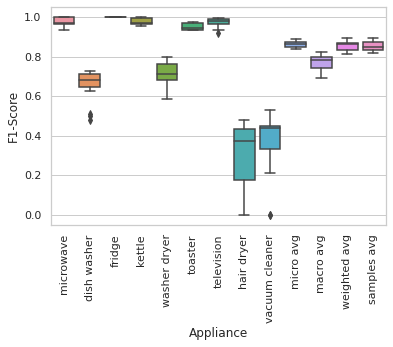

In [10]:
# ax = sns.boxplot(x="Appliance", y="F1-Score", hue="Algorithm",data=newdf)
ax = sns.boxplot(x="Appliance", y="F1-Score", data=newdf)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

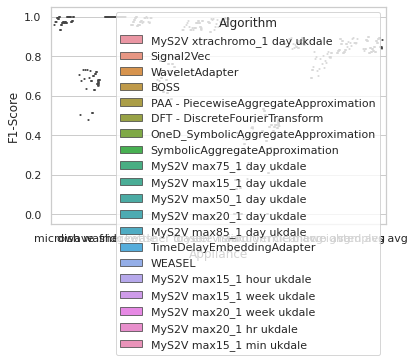

In [11]:
ax = sns.boxplot(x="Appliance", y="F1-Score", hue="Algorithm",data=newdf)

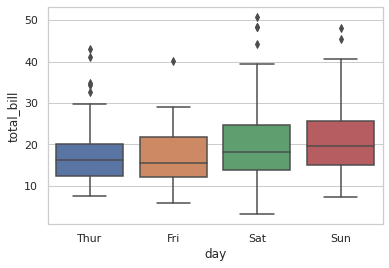

In [12]:
tips = sns.load_dataset("tips")
ax = sns.boxplot(x="day", y="total_bill", data=tips)